Final projects will be submitted as git repositories with everything that we did this semester.  This includes all of the following:

- **REPORTS** folder with bi-weekly reports relating modeling methods to your research.
- **PROJECT_PROPOSAL** Include your original proposal
- **FINAL_REPORT.ipynb** File or folder (Basically this document)
- **SOFTWARE** Folder containing your software (Likely named after your software package).
- **DOCUMENTATION** Folder containing your documentation (Likely called docs and generated using Sphinx)
- **TESTING SOFTWARE** Some level of testing software infrastructure with tests (see description below)
- **EXAMPLE SOFTWARE** Example data and tests (Ideally in jupyter notebooks) that show how to run the code.
    
This document is only a guideline and options will vary based on your individual projects.  If you have a detailed question always consider reading the [Journal of OpenSource Software submission guildlines](https://joss.readthedocs.io/en/latest/submitting.html).  I do not expect student's to follow all of them, however, given equal options, choose the ones prefered by JOSS.

- Make your software available in a git (GitLAb, GitHub, Bitbucket, etc.)
- When appropriate, make sure that the software complies with the [JOSS review criteria](https://joss.readthedocs.io/en/latest/review_criteria.html). In particular, your software should be full-featured, well-documented, and contain procedures (such as automated tests) for checking correctness.


Final presentations will be a short slideshow.  I would like to do this as a "Poster session" but it may end up being more like a 6 minute lighting talk.  [Click here for a basic slide template](https://docs.google.com/presentation/d/1M0cYUufylmtR9KAdF9BIKu03-E_pcMVPNI9GQnL8wJY/edit?usp=sharing)

# <center> Neutrino-Driven Wind Transsonic Velocity Solver </center>

<center>By Brian Nevins</center>

<img src="https://d.newsweek.com/en/full/1114076/9-10-neutron-star.webp?w=737&f=56c084b54054b0e88b09d3d4e2a022b4" width="60%">
Image from: <a href="https://www.newsweek.com/weird-neutron-star-shouldnt-exist-discovered-scientists-1140445"> Newsweek </a>

---
# Authors
Brian Nevins<br>
Dr. Luke Roberts

---
# Abstract

&#9989;  A summary describing the high-level functionality and purpose of the software for a diverse, non-specialist audience

When a massive star, between 10 and ~29 times the mass of our sun, dies, most of its outer layers are blown out to space in a massive explosion called a supernova. The inner core, about 1.4 solar masses, forms a neutron star - essentially a giant, super-dense atomic nucleus roughly 10km in radius. In a short period after the supernova explosion, some of the outer material from the dead star falls back onto the surface of the neutron star. This material is then blown back into space by the huge numbers of neutrinos being released from the newly formed neutron star as what is known as the neutrino-driven wind.

The neutrino-driven wind can be well approximated as a steady-state, time independent system, with a constant mass loss rate. The hydrodynamic equations governing the wind are:
\begin{equation}
\dot{M}=4\pi r^2 v \rho
\end{equation}

\begin{equation}
v \frac{\partial v}{\partial r}=-\frac{1}{\rho}\frac{\partial P}{\partial r}-\frac{G M}{r^2}
\end{equation}

\begin{equation}
v \frac{\partial s}{\partial r}=\frac{S_\epsilon}{n_B T}
\end{equation}

and the equation of state for the wind, which gives the specific pressure ($p$), speed of sound ($c_s$), and specific entropy ($s$). For this code we use a simple gamma law equation of state, where 
\begin{equation}
p=\rho T
\end{equation}

\begin{equation}
c_s^2=\gamma T
\end{equation}

\begin{equation}
s=\frac{1}{\gamma-1}\ln(T \rho^{1-\gamma})
\end{equation}

The governing equations can then be rewritten in terms of a timelike variable $\psi$, with respect to which we can computationally integrate using a Runge-Kutta method. The governing equations, in terms of dimensionless variables $x=\ln(\frac{r}{r_0}), u=\ln(\frac{v}{c_s}), w=\ln(\frac{T}{T_0})$, become:
\begin{equation}
\frac{dx}{d\psi}=f_1
\end{equation}

\begin{equation}
\frac{du}{d\psi}=f_2
\end{equation}

\begin{equation}
\frac{dw}{d\psi}=-(\gamma-1)(2f_1+f_2)
\end{equation}
where $f_1=1-e^{2u-w},$ $f_2=a e^{-w-x}-2$, and $a=\frac{GM}{c_s^2 r_0}$. We integrate this with an adaptive RK4 method, specifying starting values of $r=r_0$ and $T=T_0$. Our independent variable is the starting value of $v=v_0$, which we vary in order to find a realistic solution curve when we plot $v$ vs $r$. We can then use $v_0$ to find the mass loss rate $\dot{M}$.

----
# Statement of Need

The neutrino-driven wind is a site for interesting nucleosynthesis reactions. The nuclei that can be formed depend on a number of parameters, especially the mass loss rate. This code will be useful in determining mass loss rates for different equations of state, and can be adapted to incorporate other parameters such as secondary heating to determine their effect on nucleosynthesis.

----
# Installation instructions
&#9989; There should be a clearly-stated list of dependencies. Ideally these should be handled with an automated package management solution.

    Good: A package management file such as a Gemfile or package.json or equivalent
    OK: A list of dependencies to install
    Bad (not acceptable): Reliance on other software not listed by the authors
    
Dependencies:<br>
numpy<br>
matplotlib<br>
os<br>
contextlib<br>
Ipython.display

----
# Tests
Authors are strongly encouraged to include an automated test suite covering the core functionality of their software.

    Good: An automated test suite hooked up to an external service such as Travis-CI or similar
    OK: Documented manual steps that can be followed to objectively check the expected functionality of the software (e.g., a sample input file to assert behavior)
    Bad (not acceptable): No way for you the reviewer to objectively assess whether the software works
    Other considerationsMentions

&#9989;  This section of the report should include instructions on how to run the tests and interpret the results.  If possible make them runnable inside the notebook.

These tests check several of the methods in the main python file. The most important tests are the last two, which check the RK method and the bisection search for the critical velocity for simple cases and compare the results to known values. If these do not succeed, something has been changed that significantly alters the critical velocity for multiple gamma values.

In [4]:
!pytest

============================= test session starts =============================
platform win32 -- Python 3.7.3, pytest-5.0.1, py-1.8.0, pluggy-0.12.0
rootdir: D:\Documents\Brian\Important\MSU\Neutrino-driven-winds-research\neutrino-winds
plugins: arraydiff-0.3, doctestplus-0.3.0, openfiles-0.3.2, remotedata-0.3.2
collected 4 items

tests\test_Adiabatic_wind_solver.py ....                                 [100%]

========================== 4 passed in 30.42 seconds ==========================


---
# Example Usage
This code is designed to approximate the critical transsonic velocity of the neutrino-driven wind from the surface of a proto-neutron star, where the wind follows a gamma law equation of state. This is accomplished by evolving a set of ODEs until a sign change occurs in one of two characteristic functions of the system. The critical velocity is found by adjusting the starting velocity of the wind so that the two functions cross zero at the same time using a bisection method. 

In [1]:
%matplotlib inline

The difference in the zeros of these functions is easy to see in the isothermal case (gamma = 1). The curves that approach zero at large r represent "breeze" solutions, where material is lifted off the surface of the star but does not have sufficient energy to escape, and falls back to the surface. The curves that bend upward are nonphysical. The behavior of the curves is determined by which function crosses zero first. 

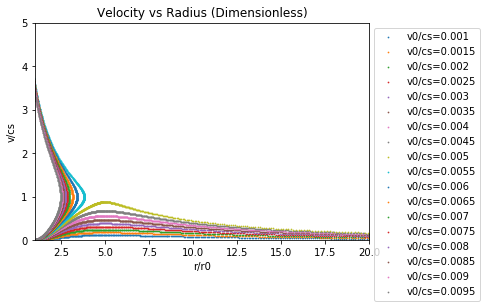

In [2]:
import Adiabatic_wind_solver as aws
s=aws.solver(1,10)
s.makePlots(.001,.01,.0005,False,20,5);

There exists a solution between these two curve sets for which the two functions cross zero at the same time. We use a bisection method to determine the bounds on the critical velocity for this to take place, as shown below.

Lower bound on v0:  0.0050753133773803714
Upper bound on v0:  0.005075325393676755
Estimated v0:  0.005075319385528563
Estimated error:  6.008148191634366e-09


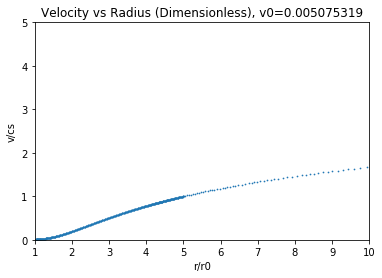

In [8]:
v0avg=s.findV0(.001,.006,.0001)
s.makePlot(v0avg)

This solution does not return to zero, and represents a true wind solution where the material blown off continues out into space.

We can also determine the critical velocity for an isentropic wind that follows an ideal gas equation of state (gamma=5/3). It is harder to see the different solution sets, but the bisection method is just as effective for finding the critical velocity.

Lower bound on v0:  0.0024934089660644527
Upper bound on v0:  0.0025187793731689433
Estimated v0:  0.002506094169616698
Estimated error:  1.2685203552245282e-05


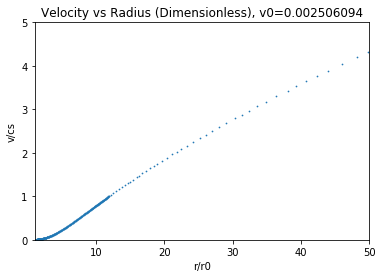

In [3]:
s1=aws.solver(5/3,.1)
v0=s1.findV0(.0001,.009,.0001)
s1.makePlot(v0,xrange=50)

We can also see how the critical velocity depends on the value of gamma, for a general gamma law equation of state. The gammaSearch function simply iterates through given range of gamma values, finds the critical velocity, and plots those velocities. The system seems to destabilize just below gamma=1.5, as the critical velocity drops dramatically to zero.

Searching gamma = 1.48000000000017
No sign change, decrementing bounds
Max iteration count exceeded at gamma = 1.48000000000017
No sign change above v0/cs = 1.925929944387236e-36


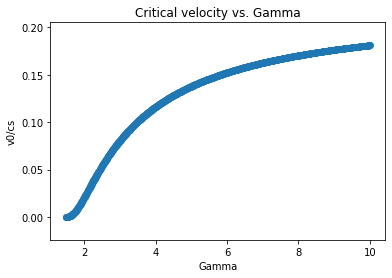

In [12]:
#This function takes a long time to evaluate
g=s1.gammaSearch(a=.1,g0=10,dg=-.01,glim=1,lower=.01,upper=.9,itermax=100)

---
# Methodology

&#9989;  A few paragraphs on how the final project matched up with your original proposal. Include how and why the project may differ to the submission guidelines.

---
# Concluding Remarks

&#9989;  A few paragraphs on what you learned and how the project reached your research goals.  Include your plans for future work.

----
# Mentions

&#9989;  Mentions (if applicable) of any ongoing research projects using the software or recent scholarly publications enabled by it

----
# References

&#9989; A list of key references including a link to the software archive